# Comparing Firearm Mortality to Firearm Ownership by State

Grace Rinehart (Colorado State University)  
Kendall Landwehr (Colorado State University)  
Andrew Zimbelman (Colorado State University)

# Introduction, Background & Motivation

Through this study, we hope to address and provide increased analysis of the problem of firearm mortality in the United States. Gun violence is a major safety, social, and public health problem within the United States and requires additional investigation. The current literature suggests that within developed nations and other high income countries, the U.S. is an outlier in its rates of gun mortality. Initially linked to America’s frontier history and culture of citizen-owned guns, the U.S. continues to protect this 2nd amendment right and tradition of freedom, protection, and spirit of rebellion (Fortune ([2018](#ref-fortune2018guns))). While a constitutional right, it may also be important to consider the needs of present-day society and how this right can be protected, yet regulated for a safer future. The large proportion of gun violence, mass shootings, and firearm mortality can partially be attributed to the weapon instrumentality effect. This is the hypothesis that the presence of guns leads to higher levels of violence, aggression, and lethal action when faced with a stressful or conflictual situation (Spieller ([2020](#ref-spieller2020gun))). While some argue that aggression and violence will occur regardless of the weapon used, the capacity for lethality also has to be considered. It is much easier to unintentionally harm someone with a firearm than a knife, for instance. Understanding the relationship between firearm ownership and firearm mortality through this study will contribute to this system of thinking. If the hypothesis that firearm ownership and firearm mortality are positively correlated, this study can serve as further evidence that additional firearm restrictions should be implemented to protect everyday American people. 

Within the U.S., gun mortality continues to be a major problem for its population, contributing to both mortality and morbidity. In 2020 alone, the Centers for Disease Control reported 45,000 firearm-related deaths with a rate of 6.1 deaths per 100,000 people. This is the highest reported rate since 1994 with 40% of deaths due to homicide and more than half due to suicide (Fontanarosa & Bibbins-Domingo ([2022](#ref-fontanarosa2022unrelenting))). Access to firearms is also shifting suicide rates and the proportion of suicide deaths by firearm. Within the 45,222 firearm deaths in 2020, 60% of those were due to suicide. Similarly, among the 45,979 suicide deaths in the same year, 51% of those were from a firearm injury (Fontanarosa & Bibbins-Domingo ([2022](#ref-fontanarosa2022unrelenting))). These statistics present a clear need for additional firearm regulation. Our study hopes to provide further evidence by illustrating a correlation between firearm ownership and firearm mortality from the Centers for Disease Control and Prevention and the World Population Review. 

This study will use one dataset from the Centers for Disease Control and Prevention ([data](https://www.cdc.gov/nchs/pressroom/sosmap/firearm_mortality/firearm.htm)) and one from the World Population Review ([data](https://worldpopulationreview.com/state-rankings/gun-ownership-by-state#sources)). The CDC dataset provides information on firearm mortality by state and this study will specifically focus on data from the year 2022. The firearm mortality data includes the number of deaths and death rate per state. More specifically, the death rate is the number of deaths per 100,000 total population. The data also ranks each of the states according to their mortality rate. Additionally, the CDC provides a visual representation of the state ranking displayed on a map of the U.S. using a gradient. 

The dataset used for firearm ownership will be provided by the World Population Review and is originally from the Pew Research Center. This source provides information on gun ownership as a percentage of households that own guns within each state. Additionally, data was collected on gun ownership licenses. It should be noted that the varying gun regulations on gun ownership throughout the country make it difficult to obtain exact numbers for firearm ownership, however, the Pew Research Center has compiled accurate and reliable data given this limitation. It is also important to note that while one state may have more guns, they may also have a higher population. Because of this, it is important to make the distinction that data is based on the total percentage of firearm ownership in relation to each state’s population. Based on the data, some general trends can be noted. Gun ownership is highest in the South with about 36% of residents owning a gun. The West and Midwest each have ownership rates of around 30%, and the Northeast has the lowest rates of gun ownership with about 16% of residents in the region owning a firearm. Moreover, individuals in rural communities have the highest rates of firearm ownership and men are more likely to own a firearm than women. Similar to the firearm mortality data, this source also provides a visual representation of its data, organized on a map of the United States along a gradient according to ownership percentage. 

Regarding the methods for this study, our data will first be cleaned and organized so it is more compatible with the functions within R studio. This study will narrow its scope to the year 2022 and focus specifically on the top five states with the highest percentage of firearm ownership. From here we will join the two data sets by state and conduct multiple statistical tests to identify the relationship between the two variables. More specifically, we will use the Shapiro test to test for normality, followed by the Spearman or Pearson test to analyze correlation. A linear regression model will also be used. After the necessary statistics have been run, we will develop ways to visualize and display the correlation using the ggplot package.

# Data Exploration

Two datasets were used in the research project, which were both obtained by the Centers for Disease Control & Prevention and the World Population Review. Our data from the Centers for Disease Control and & Prevention provides us with information related to deaths per state and mortality rate. The World Population Review gives us information related to gun ownership that we can use to analyze how the gun ownership percentage in homes per state impacts the mortality rate. A full join was used in our data-cleaning process to allow analysis to be done between the data in the different datasets. The data sets were cleaned beforehand in Excel. Both data sets were manipulated to include a year (2022) and state column with matching variable names (AK changed to Alaska, etc). Information not needed for our analysis, like the URLs column in the gun mortality data set, was removed for clarity. Data was also cleaned in R Studio, using read.csv tools. The data was imported into R where a full join was used to turn our semi-cleaned data into one dataset, renaming tools were used to make column category names less confusing and shorter. Filtering tools were used to ensure that only the 50 states are included in the dataset, such as the District of Columbia, which is already in the dataset from Washington. From our full join, some data didn’t carry over, which resulted in the manual importing of data points into the dataframe. Finally, the data was arranged based on highest to lowest gun ownership per household percentage, then a head command was used to filter the data to 5 states.

In [ ]:
library(readr)
library(flextable)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.7     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tibble       3.2.1
✔ infer        1.0.7     ✔ tidyr        1.3.1
✔ modeldata    1.4.0     ✔ tune         1.2.1
✔ parsnip      1.2.1     ✔ workflows    1.1.4
✔ purrr        1.0.2     ✔ workflowsets 1.1.0
✔ recipes      1.1.0     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::compose()  masks flextable::compose()
✖ purrr::discard()  masks scales::discard()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/


Attaching package: 'ggpubr'

The following objects are masked from 'package:flextable':

    border, font, rotate

For visualizations and tests, a ggbarplot was first created to visualize the relationship of interest between household gun ownership and death rates, This relationship was measured by grouping household gun ownership % by state, with the color of the ggbarplot being the death rate in states. This visualization showed that the top 5 states had a similar death rate as well as gun ownership rate.

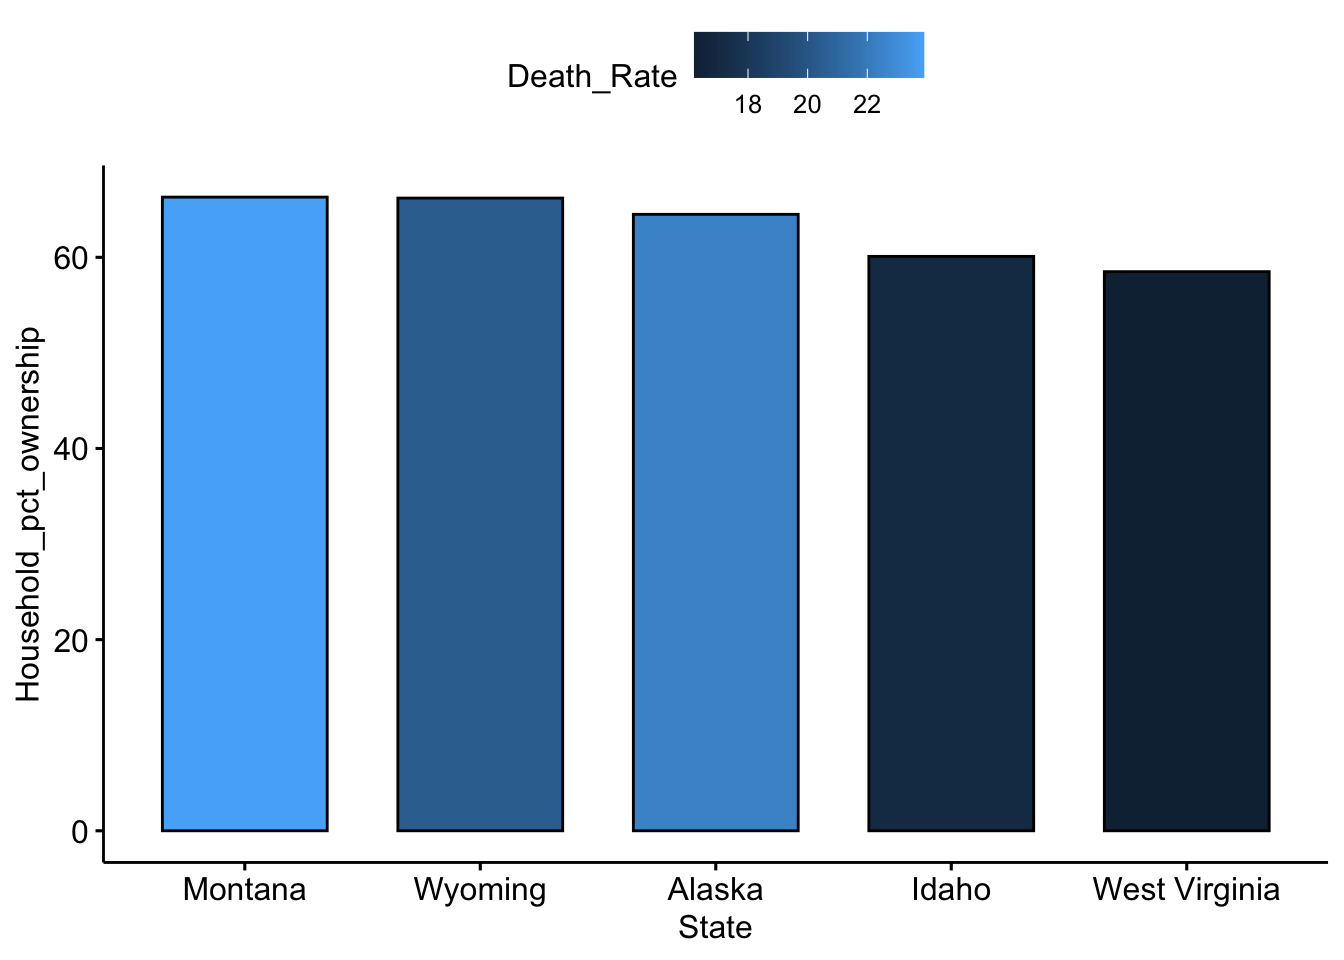

In [ ]:
plot1<- gun_data_con |>
ggbarplot(x = 'State', y = 'Household_pct_ownership',
          fill = "Death_Rate") 
print(plot1)

A Shapiro test was used to determine if there was normal distribution within our desired data which showed that the null hypothesis was not rejected which tells us that there is a normal distribution within our data that will be used for future analysis.

In [ ]:
shapiro.test(gun_data_con$Household_pct_ownership)


    Shapiro-Wilk normality test

data:  gun_data_con$Household_pct_ownership
W = 0.85262, p-value = 0.2029


    Shapiro-Wilk normality test

data:  gun_data_con$Death_Rate
W = 0.92511, p-value = 0.5634

Based on this, linear regression was used to test for a relationship between our desired variables, this test rejected the null hypothesis, which suggests that there is a statistically significant relationship between gun ownership % per household and death rate. The R-squared value was in the 80% range, which tells us that there is a strong relationship between our variables. With this, a scatter plot was made with a best-fit line highlighting the residuals within the data relative to the best-fit line. Data may be more strongly correlated, but due to the sample size, it appears as being less correlated.

`geom_smooth()` using formula = 'y ~ x'

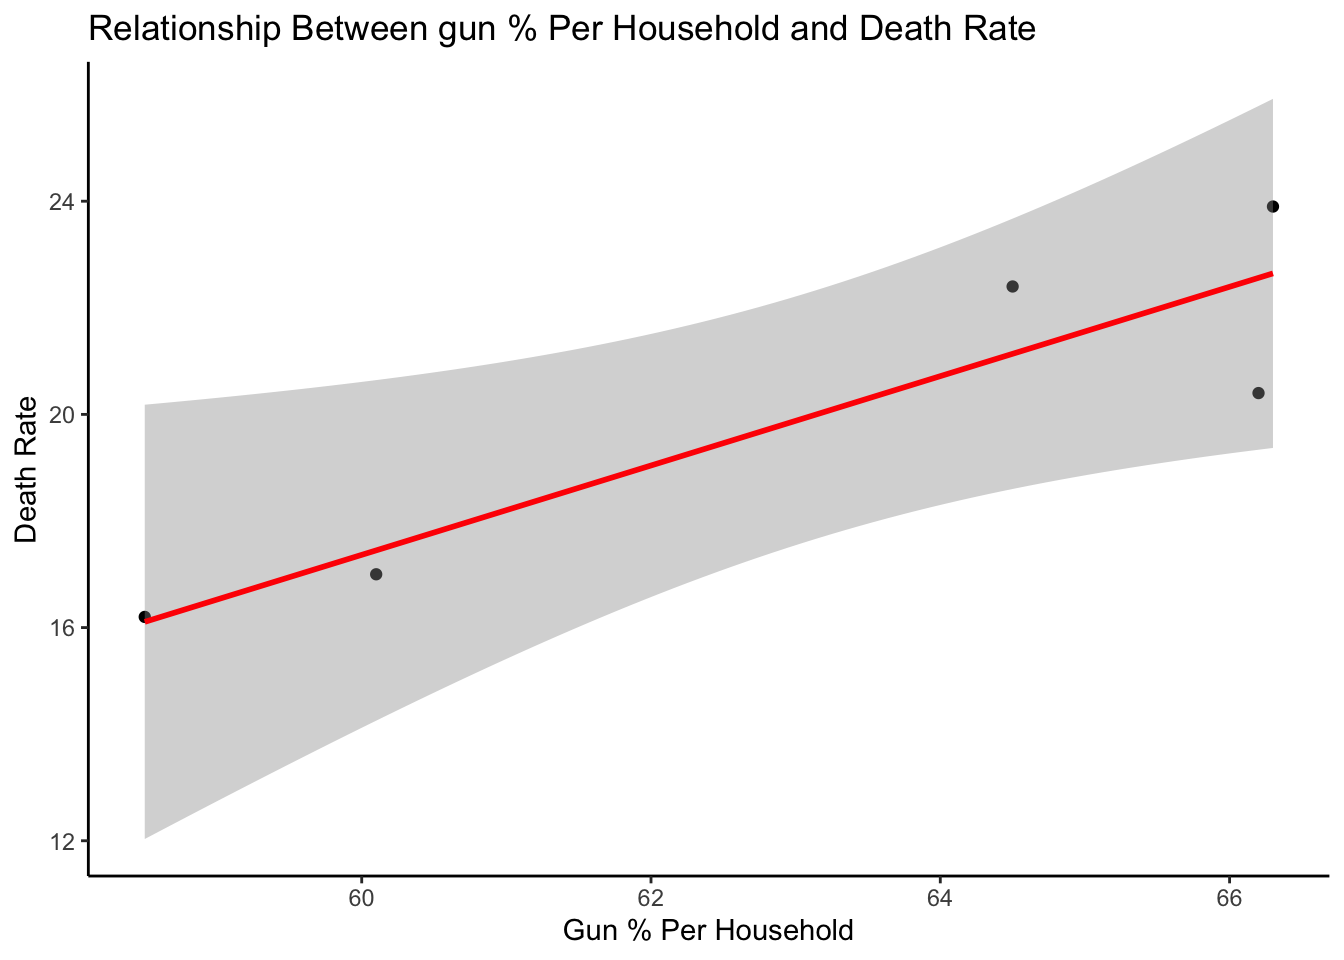


Call:
lm(formula = Household_pct_ownership ~ Death_Rate, data = gun_data_con)

Residuals:
      1       2       3       4       5 
-0.6515  2.6695 -0.9854 -0.1073 -0.9253 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  43.5910     5.3535   8.143  0.00387 **
Death_Rate    0.9774     0.2650   3.688  0.03455 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.769 on 3 degrees of freedom
Multiple R-squared:  0.8193,    Adjusted R-squared:  0.7591 
F-statistic:  13.6 on 1 and 3 DF,  p-value: 0.03455

In [ ]:
plot2 <- ggplot(gun_data_con, aes(x = Household_pct_ownership, y = Death_Rate)) +
  geom_point() +
  geom_smooth(method = lm, color = 'red') +
  labs(x = "Gun % Per Household",
       y = "Death Rate",
       title = "Relationship Between gun % Per Household and Death Rate ") +
  theme_classic()
print(plot2)

# Methods

We have decided to scale back our analysis to look at the top 5 states with the most gun licenses and compare the gun mortality in those states. Once our data has been tested for normality using the Shapiro test, we’ll look at the correlation between the variables using the Spearman or Pearson tests, depending on whether or not the data is normally distributed. Once our data has been tested, we’ll analyze our hypothesis using a linear regression model. We could bring in supplemental data involving parameters like state population and income as control variables for our model. One potential challenge in the data is choosing which variables to use for our analysis. The CDC gun mortality data set includes both the death rate as a percentage and the total number of deaths for each state. The World Population Review data set for gun ownership includes the percentage of households that own guns and gun ownership licenses in each state. Choosing the correct variable for our analysis is important to prevent our data from skewing, hence why adding a state population data set may be beneficial.

It would be best for us to conduct our analysis using per capita values, as those will give us more accurate representations of each state’s gun mortality and gun ownership rates. Some challenges in the methods would be the lack of in-depth analysis. Due to our variables expected strong, positive correlation, there is only so much analysis we can do. This is another reason why adding another data set could prove to be useful. Our current selected methods will allow us to examine out hypothesis in the most direct manner, and our correlations will be easy to see in graphs and figures with a linear regression model. The methods we have outlined provide the most streamline analysis, and will allow us to reach our goal of proving our hypothesis efficiently.

Fontanarosa, P. B., & Bibbins-Domingo, K. (2022). The unrelenting epidemic of firearm violence. *JAMA*, *328*(12), 1201–1203.

Fortune, P. (2018). *Guns in america: What do the data tell us?*

Spieller, L. (2020). Gun control in america: A global comparison. *Themis: Research Journal of Justice Studies and Forensic Science*, *8*(1), 7.